In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bs4 import BeautifulSoup as soup  # HTML parser
import requests  # Page requests
import re  # Regular expressions
import time  # Time delays
import random  # Random numbers

header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36'}
url = 'https://richmond.craigslist.org/search/mca?purveyor=owner#search=1~gallery~0~0'
raw = requests.get(url, headers=header)  # Get page

brands = ['suzuki', 'harley', 'indian', 'yamaha', 'ducati', 'vespa', 'honda', 'harley-davidson', 'bmw', 'kawasaki', 'triumph', 'can-am', 'husqvarna']

bsObj = soup(raw.content, 'html.parser')  # Parse the html
listings = bsObj.find_all(class_="cl-static-search-result")  # Find all listings



In [76]:
data = [] # We'll save our listings in this object
for k in range( len(listings) ):
    title = listings[k].find('div',class_='title').get_text().lower()
    price = listings[k].find('div',class_='price').get_text()
    link = listings[k].find(href=True)['href']
    # Get brand from the title string:
    words = title.split()
    hits = [word for word in words if word in brands] # Find brands in the title
    if len(hits) == 0:
        brand = 'missing'
    else:
        brand = hits[0]
    # Get years from title string:
    regex_search = re.search(r'20[0-9][0-9]|19[0-9][0-9]', title ) # Find year references
    if regex_search is None: # If no hits, record year as missing value
        year = np.nan 
    else: # If hits, record year as first match
        year = regex_search.group(0)

    data.append({'title':title,'price':price,'year':year,'link':link,'brand':brand})

In [77]:
## Wrangle the data
df = pd.DataFrame.from_dict(data)
df['price'] = df['price'].str.replace('$','')
df['price'] = df['price'].str.replace(',','')
df['price'] = pd.to_numeric(df['price'],errors='coerce')
df['year'] = pd.to_numeric(df['year'],errors='coerce')
df['age'] = 2025-df['year']
print(df.shape)
df.to_csv('craigslist_richmond_motorcycles.csv')
df.head()


(65, 6)


,title,price,year,link,brand,age
0,2006 suzuki hayabusa,5000,2006.0,https://richmond.craigslist.org/mcy/d/richmond...,suzuki,19.0
1,"1974 suzuki gt 380 time capsule beauty 3,800 m...",7500,1974.0,https://richmond.craigslist.org/mcy/d/richmond...,suzuki,51.0
2,2023 honda xr150l,3250,2023.0,https://richmond.craigslist.org/mcy/d/glen-all...,honda,2.0
3,2023 klr 650 adventure,6500,2023.0,https://richmond.craigslist.org/mcy/d/amelia-c...,missing,2.0
4,2004 kawasaki zx10r,2000,2004.0,https://richmond.craigslist.org/mcy/d/midlothi...,kawasaki,21.0


count       65.000000
mean      7076.061538
std       4163.078935
min        800.000000
25%       3500.000000
50%       6400.000000
75%       9000.000000
max      20000.000000
Name: price, dtype: float64


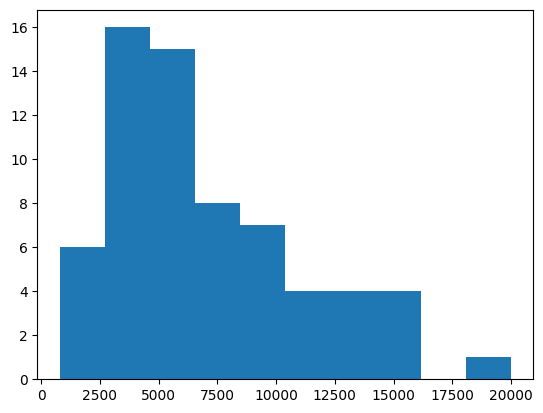

count    52.000000
mean     16.326923
std      12.157014
min       1.000000
25%       7.500000
50%      16.500000
75%      21.000000
max      52.000000
Name: age, dtype: float64


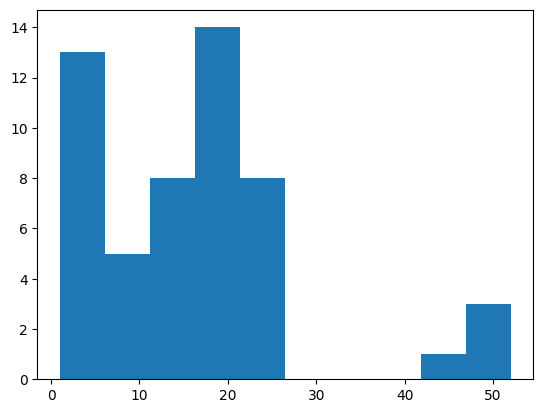

In [78]:
# EDA for price and age:
print(df['price'].describe())
df['price'].hist(grid=False)
plt.show()
print(df['age'].describe())
df['age'].hist(grid=False)
plt.show()

In [79]:
# Price by brand:
df.loc[:,['price','brand']].groupby('brand').describe()

price                                                        \
          count          mean          std      min      25%      50%   
brand                                                                   
bmw         1.0   7500.000000          NaN   7500.0   7500.0   7500.0   
can-am      1.0  13000.000000          NaN  13000.0  13000.0  13000.0   
ducati      1.0   4500.000000          NaN   4500.0   4500.0   4500.0   
harley     15.0   8486.600000  3813.531431   2700.0   6500.0   8500.0   
honda      14.0   4710.357143  2529.487987    800.0   3312.5   3950.0   
husqvarna   1.0   6000.000000          NaN   6000.0   6000.0   6000.0   
kawasaki    3.0   3166.666667  1607.275127   2000.0   2250.0   2500.0   
missing    20.0   9020.000000  4922.194632   1500.0   5875.0   8050.0   
suzuki      4.0   4550.000000  2215.851981   2700.0   2925.0   4000.0   
triumph     2.0   8050.000000  2616.295090   6200.0   7125.0   8050.0   
yamaha      3.0   3833.333333  1357.694124   3000.0   3050.0   3100.0   

                             
               75%      max  
brand                        
bmw         7500.0   7500.0  
can-am     13000.0  13000.0  
ducati      4500.0   4500.0  
harley     10000.0  15999.0  
honda       5400.0  10995.0  
husqvarna   6000.0   6000.0  
kawasaki    3750.0   5000.0  
missing    12500.0  20000.0  
suzuki      5625.0   7500.0  
triumph     8975.0   9900.0  
yamaha      4250.0   5400.0

In [80]:
# Age by brand:
df.loc[:,['age','brand']].groupby('brand').describe()

age                                                      
          count       mean        std   min    25%   50%    75%   max
brand                                                                
bmw         1.0   8.000000        NaN   8.0   8.00   8.0   8.00   8.0
can-am      1.0   5.000000        NaN   5.0   5.00   5.0   5.00   5.0
ducati      1.0  24.000000        NaN  24.0  24.00  24.0  24.00  24.0
harley     12.0  16.000000   6.941312   3.0  11.00  17.0  21.25  26.0
honda      11.0  14.363636  12.706477   2.0   3.50  17.0  21.00  43.0
husqvarna   0.0        NaN        NaN   NaN    NaN   NaN    NaN   NaN
kawasaki    3.0  18.333333   3.785939  14.0  17.00  20.0  20.50  21.0
missing    15.0  14.933333  12.504095   1.0   7.00  12.0  20.00  52.0
suzuki      4.0  27.000000  16.186414  16.0  18.25  20.5  29.25  51.0
triumph     2.0   2.500000   0.707107   2.0   2.25   2.5   2.75   3.0
yamaha      2.0  35.000000  22.627417  19.0  27.00  35.0  43.00  51.0

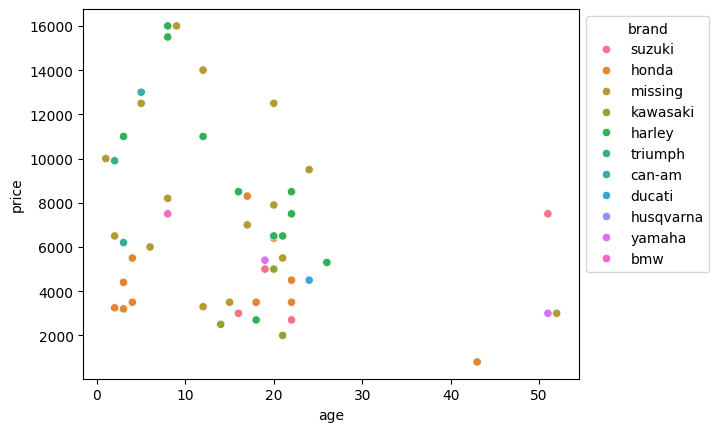

In [81]:
ax = sns.scatterplot(data=df, x='age', y='price',hue='brand')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

           log_price   log_age
log_price   0.402289 -0.166927
log_age    -0.166927  0.853991
           log_price   log_age
log_price   1.000000 -0.296868
log_age    -0.296868  1.000000


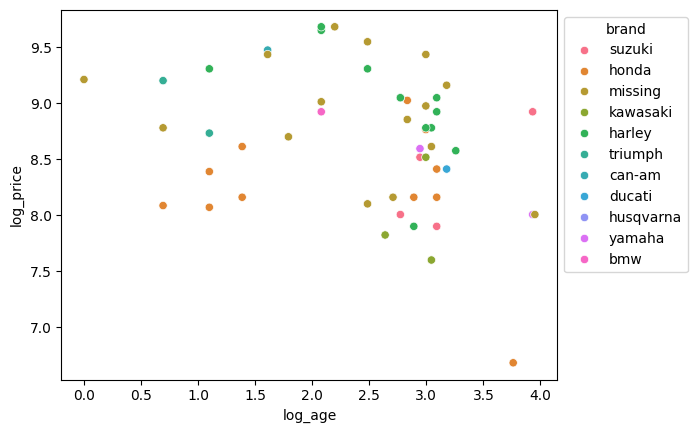

In [82]:
df['log_price'] = np.log(df['price'])
df['log_age'] = np.log(df['age'])

ax = sns.scatterplot(data=df, x='log_age', y='log_price',hue='brand')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

print(df.loc[:,['log_price','log_age']].cov())
print(df.loc[:,['log_price','log_age']].corr())

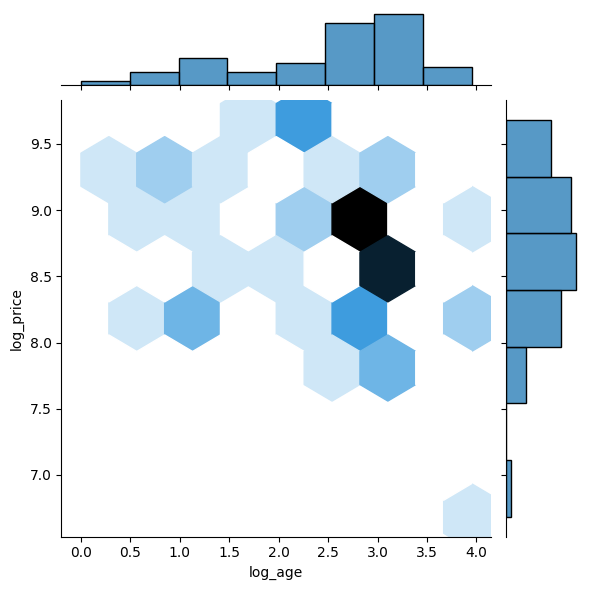

In [83]:
sns.jointplot(data=df, x='log_age', y='log_price',kind='hex')